Retorno Absoluto: 961 $
Retorno relativo: 99 %


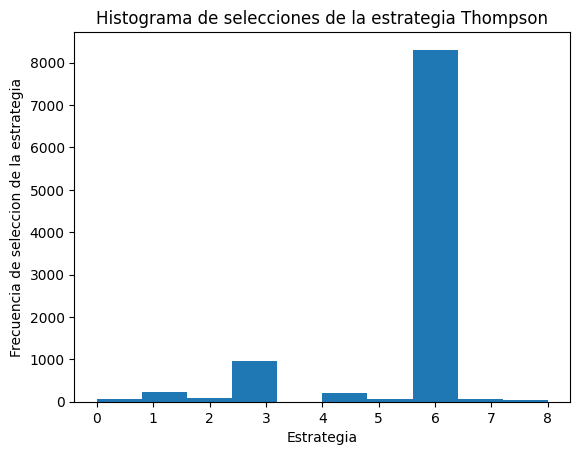

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Configurar parametros
N = 10000
d = 9

# Creación de la simulación
conversion_rates = [0.05, 0.13, 0.09, 0.16, 0.11, 0.04, 0.2, 0.08, 0.01]

X = np.array(np.zeros((N, d)))

for i in range(N):
  for j in range(d):
    if np.random.rand() <= conversion_rates[j]:
      X[i, j] = 1

strategy_selected_random_strategy = []
strategy_selected_thompson_strategy = []

total_reward_random_strategy = 0
total_reward_thompson_strategy = 0
number_of_reward_1 = [0] * d
number_of_reward_0 = [0] * d

for n in range(0, N):
  # Selección Aleatoria
  strategy_rs = random.randrange(d)
  strategy_selected_random_strategy.append(strategy_rs)
  reward_rs = X[n, strategy_rs]
  total_reward_random_strategy += reward_rs

  # Muestreo de thompson
  strategy_ts = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(number_of_reward_1[i]+1,
                                     number_of_reward_0[i]+1)
    if random_beta > max_random:
      max_random = random_beta
      strategy_ts = i

  reward_ts = X[n, strategy_ts]
  if reward_ts == 1:
    number_of_reward_1[strategy_ts] += 1
  else:
    number_of_reward_0[strategy_ts] += 1

  strategy_selected_thompson_strategy.append(strategy_ts)
  total_reward_thompson_strategy += reward_ts


# Calcular retorno relativo y absoluto
absolute_return = (total_reward_thompson_strategy - total_reward_random_strategy)
relative_return = (total_reward_thompson_strategy - total_reward_random_strategy) / total_reward_random_strategy * 100

print("Retorno Absoluto: {:.0f} $".format(absolute_return))
print("Retorno relativo: {:.0f} %".format(relative_return))

# Representacion histograma selecciones
plt.hist(strategy_selected_thompson_strategy)
plt.title("Histograma de selecciones de la estrategia Thompson")
plt.xlabel("Estrategia")
plt.ylabel("Frecuencia de seleccion de la estrategia")
plt.show()


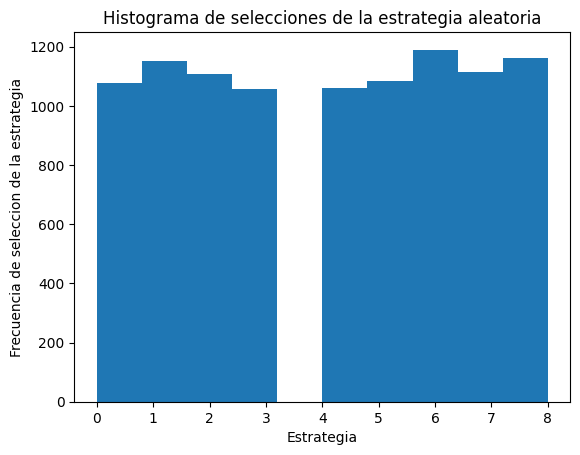

In [ ]:
import matplotlib.pyplot as plt

plt.hist(strategy_selected_random_strategy)
plt.title("Histograma de selecciones de la estrategia aleatoria")
plt.xlabel("Estrategia")
plt.ylabel("Frecuencia de seleccion de la estrategia")
plt.show()

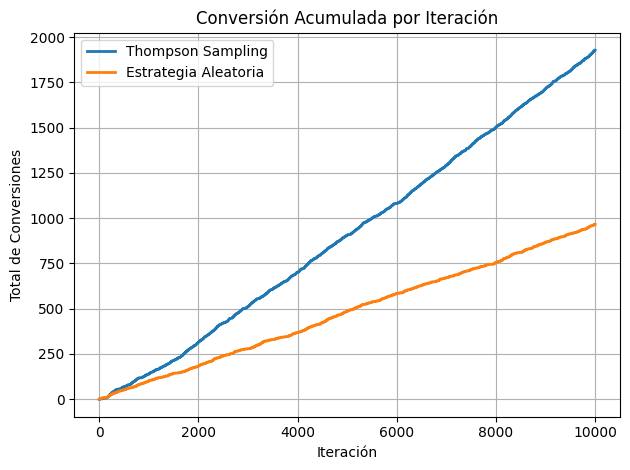

In [ ]:
# Crear listas de recompensas por iteración para cada estrategia
reward_history_ts = []
reward_history_rs = []

total_reward_ts = 0
total_reward_rs = 0

for n in range(N):
    # Recompensa aleatoria
    strategy_rs = strategy_selected_random_strategy[n]
    reward_rs = X[n, strategy_rs]
    total_reward_rs += reward_rs
    reward_history_rs.append(total_reward_rs)

    # Recompensa Thompson
    strategy_ts = strategy_selected_thompson_strategy[n]
    reward_ts = X[n, strategy_ts]
    total_reward_ts += reward_ts
    reward_history_ts.append(total_reward_ts)

# Graficar
plt.plot(reward_history_ts, label="Thompson Sampling", linewidth=2)
plt.plot(reward_history_rs, label="Estrategia Aleatoria", linewidth=2)
plt.title("Conversión Acumulada por Iteración")
plt.xlabel("Iteración")
plt.ylabel("Total de Conversiones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
valor_conversion = 20

valor_total_random = total_reward_random_strategy * valor_conversion
valor_total_thompson = total_reward_thompson_strategy * valor_conversion
retorno_dolares = valor_total_thompson - valor_total_random

print(f"Valor generado con estrategia aleatoria: {valor_total_random:.2f} $")
print(f"Valor generado con Thompson Sampling: {valor_total_thompson:.2f} $")
print(f"Beneficio adicional gracias a Thompson Sampling: {retorno_dolares:.2f} $")


Valor generado con estrategia aleatoria: 19320.00 $
Valor generado con Thompson Sampling: 38540.00 $
Beneficio adicional gracias a Thompson Sampling: 19220.00 $


In [ ]:
len(strategy_selected_thompson_strategy)


10000

In [ ]:
len(strategy_selected_random_strategy)

10000

In [ ]:
# Representa gráficamente la curva de arrepentimiento de la estrategia aleatoria

rewards_strategies = [0] * d
for n in range(0, N):
    # Best Strategy
    for i in range(0, d):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
    total_reward_bs = max(rewards_strategies)

# Regret of Thompson Sampling
strategies_selected_ts = []
total_reward_ts = 0
total_reward_bs = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
rewards_strategies = [0] * d
regret = []

for n in range(0, N):
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1,
        numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
        reward_ts = X[n, strategy_ts]
        if reward_ts == 1:
            numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1
        else:
            numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
        strategies_selected_ts.append(strategy_ts)
        total_reward_ts = total_reward_ts + reward_ts
        # Best Strategy
        for i in range(0, d):
            rewards_strategies[i] = rewards_strategies[i] + X[n, i]
        total_reward_bs = max(rewards_strategies)
        # Regret
        regret.append(total_reward_bs - total_reward_ts)

# Regret of the Random Strategy
strategies_selected_rs = []
total_reward_rs = 0
total_reward_bs = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
rewards_strategies = [0] * d
regret = []
for n in range(0, N):
    # Random Strategy
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs
    # Best Strategy
    for i in range(0, d):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]
    total_reward_bs = max(rewards_strategies)
    # Regret
    regret.append(total_reward_bs - total_reward_rs)

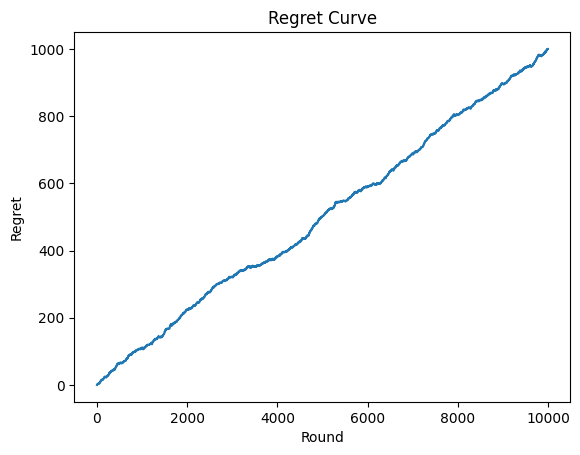

In [ ]:
# Plotting the Regret Curve
plt.plot(regret)
plt.title('Regret Curve')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.show()

In [ ]:
"""
core/mab.py - Implementación base de Multi-Armed Bandit
"""
from abc import ABC, abstractmethod
import numpy as np
from typing import Dict, List, Any, Optional, Tuple


class Arm:
    """Representa un brazo (variante) en el problema MAB"""

    def __init__(self, arm_id: str, name: str, metadata: Optional[Dict[str, Any]] = None):
        self.arm_id = arm_id
        self.name = name
        self.metadata = metadata or {}
        self.total_rewards = 0.0
        self.total_pulls = 0
        self.history = []  # Historial de recompensas

    def update(self, reward: float) -> None:
        """Actualiza estadísticas del brazo después de recibir una recompensa"""
        self.total_rewards += reward
        self.total_pulls += 1
        self.history.append(reward)

    @property
    def mean_reward(self) -> float:
        """Devuelve la recompensa media de este brazo"""
        if self.total_pulls == 0:
            return 0.0
        return self.total_rewards / self.total_pulls

    def to_dict(self) -> Dict[str, Any]:
        """Convierte el brazo a un diccionario para serialización"""
        return {
            "arm_id": self.arm_id,
            "name": self.name,
            "metadata": self.metadata,
            "total_rewards": self.total_rewards,
            "total_pulls": self.total_pulls,
            "mean_reward": self.mean_reward
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'Arm':
        """Crea un brazo a partir de un diccionario"""
        arm = cls(data["arm_id"], data["name"], data.get("metadata"))
        arm.total_rewards = data["total_rewards"]
        arm.total_pulls = data["total_pulls"]
        if "history" in data:
            arm.history = data["history"]
        return arm


class BanditStrategy(ABC):
    """Interfaz abstracta para estrategias de Multi-Armed Bandit"""

    @abstractmethod
    def select_arm(self, arms: Dict[str, Arm]) -> str:
        """Selecciona el próximo brazo a tirar"""
        pass

    @abstractmethod
    def update(self, arm_id: str, reward: float, arms: Dict[str, Arm]) -> None:
        """Actualiza la estrategia con el resultado de la última recompensa"""
        pass

    @abstractmethod
    def to_dict(self) -> Dict[str, Any]:
        """Convierte la estrategia a un diccionario para serialización"""
        pass

    @classmethod
    @abstractmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'BanditStrategy':
        """Crea una estrategia a partir de un diccionario"""
        pass


class MultiArmedBandit:
    """Clase principal para gestionar experimentos Multi-Armed Bandit"""

    def __init__(self, experiment_id: str, name: str, strategy: BanditStrategy):
        self.experiment_id = experiment_id
        self.name = name
        self.arms: Dict[str, Arm] = {}
        self.strategy = strategy
        self.total_pulls = 0
        self.creation_date = None
        self.last_updated = None
        self.metadata = {}

    def add_arm(self, arm_id: str, name: str, metadata: Optional[Dict[str, Any]] = None) -> None:
        """Añade un nuevo brazo al experimento"""
        if arm_id in self.arms:
            raise ValueError(f"El brazo con ID {arm_id} ya existe")
        self.arms[arm_id] = Arm(arm_id, name, metadata)

    def remove_arm(self, arm_id: str) -> None:
        """Elimina un brazo del experimento"""
        if arm_id not in self.arms:
            raise ValueError(f"El brazo con ID {arm_id} no existe")
        del self.arms[arm_id]

    def select_arm(self) -> str:
        """Selecciona el próximo brazo basado en la estrategia"""
        if not self.arms:
            raise ValueError("No hay brazos disponibles para seleccionar")
        return self.strategy.select_arm(self.arms)

    def update(self, arm_id: str, reward: float) -> None:
        """Actualiza el brazo y la estrategia con una nueva recompensa"""
        if arm_id not in self.arms:
            raise ValueError(f"El brazo con ID {arm_id} no existe")

        self.arms[arm_id].update(reward)
        self.strategy.update(arm_id, reward, self.arms)
        self.total_pulls += 1

    def get_stats(self) -> Dict[str, Any]:
        """Devuelve estadísticas del experimento"""
        return {
            "experiment_id": self.experiment_id,
            "name": self.name,
            "total_pulls": self.total_pulls,
            "arms": {arm_id: arm.to_dict() for arm_id, arm in self.arms.items()},
            "best_arm": self._get_best_arm(),
            "strategy": self.strategy.__class__.__name__
        }

    def _get_best_arm(self) -> Optional[Dict[str, Any]]:
        """Devuelve el brazo con la mayor recompensa media"""
        if not self.arms:
            return None

        best_arm = None
        best_reward = -float('inf')

        for arm in self.arms.values():
            if arm.total_pulls > 0 and arm.mean_reward > best_reward:
                best_reward = arm.mean_reward
                best_arm = arm

        if best_arm:
            return best_arm.to_dict()
        return None

    def to_dict(self) -> Dict[str, Any]:
        """Convierte el experimento a un diccionario para serialización"""
        return {
            "experiment_id": self.experiment_id,
            "name": self.name,
            "arms": {arm_id: arm.to_dict() for arm_id, arm in self.arms.items()},
            "strategy": {
                "type": self.strategy.__class__.__name__,
                "params": self.strategy.to_dict()
            },
            "total_pulls": self.total_pulls,
            "metadata": self.metadata,
            "creation_date": self.creation_date,
            "last_updated": self.last_updated
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any], strategy_map: Dict[str, type]) -> 'MultiArmedBandit':
        """Crea un experimento a partir de un diccionario"""
        strategy_data = data["strategy"]
        strategy_type = strategy_data["type"]
        strategy_class = strategy_map.get(strategy_type)

        if not strategy_class:
            raise ValueError(f"Estrategia desconocida: {strategy_type}")

        strategy = strategy_class.from_dict(strategy_data["params"])
        mab = cls(data["experiment_id"], data["name"], strategy)

        for arm_id, arm_data in data["arms"].items():
            mab.arms[arm_id] = Arm.from_dict(arm_data)

        mab.total_pulls = data["total_pulls"]
        mab.metadata = data.get("metadata", {})
        mab.creation_date = data.get("creation_date")
        mab.last_updated = data.get("last_updated")

        return mab

In [ ]:
"""
core/thompson.py - Implementación de Thompson Sampling
"""
import numpy as np
from typing import Dict, Any, Optional, List
# from .mab import Arm, BanditStrategy


class ThompsonSampling(BanditStrategy):
    """
    Implementación de Thompson Sampling para problemas de bandidos multi-brazo.

    Thompson Sampling es un algoritmo bayesiano que mantiene una distribución posterior
    para la tasa de recompensa de cada brazo. Para entornos de recompensas binarias
    (éxito/fracaso), se utilizan distribuciones Beta.
    """

    def __init__(self, alpha_prior: float = 1.0, beta_prior: float = 1.0):
        """
        Inicializa la estrategia Thompson Sampling.

        Args:
            alpha_prior: Parámetro alpha inicial para la distribución Beta (éxitos)
            beta_prior: Parámetro beta inicial para la distribución Beta (fracasos)
        """
        self.alpha_prior = alpha_prior
        self.beta_prior = beta_prior
        # Diccionarios para mantener los parámetros de cada brazo
        self.alphas: Dict[str, float] = {}
        self.betas: Dict[str, float] = {}

    def _ensure_arm_initialized(self, arm_id: str) -> None:
        """Asegura que el brazo tenga valores iniciales para alpha y beta"""
        if arm_id not in self.alphas:
            self.alphas[arm_id] = self.alpha_prior
        if arm_id not in self.betas:
            self.betas[arm_id] = self.beta_prior

    def select_arm(self, arms: Dict[str, Arm]) -> str:
        """
        Selecciona un brazo según la estrategia Thompson Sampling.

        Para cada brazo, se toma una muestra de su distribución posterior
        Beta(alpha, beta) y se selecciona el brazo con la muestra más alta.
        """
        if not arms:
            raise ValueError("No hay brazos disponibles para seleccionar")

        # Aseguramos que todos los brazos tengan parámetros inicializados
        for arm_id in arms:
            self._ensure_arm_initialized(arm_id)

        # Tomamos una muestra de cada distribución Beta
        samples = {
            arm_id: np.random.beta(self.alphas[arm_id], self.betas[arm_id])
            for arm_id in arms
        }

        # Retornamos el brazo con la muestra más alta
        return max(samples, key=samples.get)

    def update(self, arm_id: str, reward: float, arms: Dict[str, Arm]) -> None:
        """
        Actualiza los parámetros posterior del brazo basado en la recompensa recibida.

        Para recompensas binarias (0 o 1):
        - Si reward = 1, incrementamos alpha (éxito)
        - Si reward = 0, incrementamos beta (fracaso)

        Para recompensas continuas (0.0 a 1.0):
        - Incrementamos alpha proporcionalmente a la recompensa
        - Incrementamos beta proporcionalmente a (1 - recompensa)
        """
        self._ensure_arm_initialized(arm_id)

        # Manejo de recompensas binarias y continuas
        if reward == 0 or reward == 1:
            # Recompensa binaria
            self.alphas[arm_id] += reward
            self.betas[arm_id] += (1 - reward)
        else:
            # Recompensa continua entre 0 y 1
            if not 0 <= reward <= 1:
                raise ValueError(f"Para Thompson Sampling, las recompensas deben estar entre 0 y 1, recibido: {reward}")

            self.alphas[arm_id] += reward
            self.betas[arm_id] += (1 - reward)

    def get_probabilities(self, arms: Dict[str, Arm]) -> Dict[str, float]:
        """
        Calcula la probabilidad esperada de éxito para cada brazo
        basada en los parámetros actuales de la distribución Beta.
        """
        probs = {}
        for arm_id in arms:
            self._ensure_arm_initialized(arm_id)
            alpha = self.alphas[arm_id]
            beta = self.betas[arm_id]
            # La media de una distribución Beta(alpha, beta) es alpha/(alpha+beta)
            probs[arm_id] = alpha / (alpha + beta)

        return probs

    def to_dict(self) -> Dict[str, Any]:
        """Convierte la estrategia a un diccionario para serialización"""
        return {
            "alpha_prior": self.alpha_prior,
            "beta_prior": self.beta_prior,
            "alphas": self.alphas,
            "betas": self.betas
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'ThompsonSampling':
        """Crea una estrategia a partir de un diccionario"""
        strategy = cls(
            alpha_prior=data.get("alpha_prior", 1.0),
            beta_prior=data.get("beta_prior", 1.0)
        )
        strategy.alphas = data.get("alphas", {})
        strategy.betas = data.get("betas", {})
        return strategy


class GaussianThompsonSampling(BanditStrategy):
    """
    Implementación de Thompson Sampling con distribución Gaussiana.

    Esta implementación es útil para recompensas con valores reales que siguen
    una distribución normal, como tasas de conversión, ingresos, etc.
    """

    def __init__(self, mu_prior: float = 0.0, lambda_prior: float = 1.0,
                 alpha_prior: float = 1.0, beta_prior: float = 1.0):
        """
        Inicializa la estrategia Thompson Sampling Gaussiana.

        Args:
            mu_prior: Media previa
            lambda_prior: Precisión previa (inversa de la varianza)
            alpha_prior: Parámetro de forma para la distribución Gamma de precisión
            beta_prior: Parámetro de escala para la distribución Gamma de precisión
        """
        self.mu_prior = mu_prior
        self.lambda_prior = lambda_prior
        self.alpha_prior = alpha_prior
        self.beta_prior = beta_prior

        # Diccionarios para mantener los parámetros de cada brazo
        self.mus: Dict[str, float] = {}
        self.lambdas: Dict[str, float] = {}
        self.alphas: Dict[str, float] = {}
        self.betas: Dict[str, float] = {}

        # Para seguimiento de datos
        self.sums: Dict[str, float] = {}
        self.sum_squares: Dict[str, float] = {}
        self.counts: Dict[str, int] = {}

    def _ensure_arm_initialized(self, arm_id: str) -> None:
        """Asegura que el brazo tenga valores iniciales para todos los parámetros"""
        if arm_id not in self.mus:
            self.mus[arm_id] = self.mu_prior
        if arm_id not in self.lambdas:
            self.lambdas[arm_id] = self.lambda_prior
        if arm_id not in self.alphas:
            self.alphas[arm_id] = self.alpha_prior
        if arm_id not in self.betas:
            self.betas[arm_id] = self.beta_prior
        if arm_id not in self.sums:
            self.sums[arm_id] = 0.0
        if arm_id not in self.sum_squares:
            self.sum_squares[arm_id] = 0.0
        if arm_id not in self.counts:
            self.counts[arm_id] = 0

    def select_arm(self, arms: Dict[str, Arm]) -> str:
        """
        Selecciona un brazo según la estrategia Thompson Sampling Gaussiana.

        Para cada brazo, se toma una muestra de su distribución posterior
        Normal-Gamma y se selecciona el brazo con la muestra más alta.
        """
        if not arms:
            raise ValueError("No hay brazos disponibles para seleccionar")

        samples = {}
        for arm_id in arms:
            self._ensure_arm_initialized(arm_id)

            # Muestrear precisión (tau) de una distribución Gamma
            tau = np.random.gamma(self.alphas[arm_id], 1.0/self.betas[arm_id])

            # Muestrear media (mu) de una distribución Normal
            mu = np.random.normal(self.mus[arm_id], 1.0/np.sqrt(self.lambdas[arm_id] * tau))

            samples[arm_id] = mu

        # Retornamos el brazo con la muestra más alta
        return max(samples, key=samples.get)

    def update(self, arm_id: str, reward: float, arms: Dict[str, Arm]) -> None:
        """
        Actualiza los parámetros posteriores del brazo basado en la recompensa recibida.

        Actualiza los parámetros de la distribución Normal-Gamma conjugada.
        """
        self._ensure_arm_initialized(arm_id)

        # Actualizar estadísticas
        self.counts[arm_id] += 1
        self.sums[arm_id] += reward
        self.sum_squares[arm_id] += reward * reward

        n = self.counts[arm_id]
        sum_x = self.sums[arm_id]
        sum_x2 = self.sum_squares[arm_id]

        # Actualizar parámetros posterior
        self.lambdas[arm_id] = self.lambda_prior + n
        self.mus[arm_id] = (self.lambda_prior * self.mu_prior + sum_x) / self.lambdas[arm_id]

        # Actualizar parámetros de precisión
        mean = sum_x / n if n > 0 else 0

        # Varianza muestral * (n-1)
        variance_term = sum_x2 - 2 * mean * sum_x + n * mean * mean

        # Término de precisión previa
        prior_term = self.lambda_prior * n * (mean - self.mu_prior)**2 / (self.lambda_prior + n)

        self.alphas[arm_id] = self.alpha_prior + n / 2
        self.betas[arm_id] = self.beta_prior + 0.5 * (variance_term + prior_term)

    def get_expected_values(self, arms: Dict[str, Arm]) -> Dict[str, float]:
        """
        Calcula el valor esperado para cada brazo basado en los parámetros actuales.
        """
        values = {}
        for arm_id in arms:
            self._ensure_arm_initialized(arm_id)
            # La media de la distribución posterior es el valor esperado
            values[arm_id] = self.mus[arm_id]

        return values

    def to_dict(self) -> Dict[str, Any]:
        """Convierte la estrategia a un diccionario para serialización"""
        return {
            "mu_prior": self.mu_prior,
            "lambda_prior": self.lambda_prior,
            "alpha_prior": self.alpha_prior,
            "beta_prior": self.beta_prior,
            "mus": self.mus,
            "lambdas": self.lambdas,
            "alphas": self.alphas,
            "betas": self.betas,
            "sums": self.sums,
            "sum_squares": self.sum_squares,
            "counts": self.counts
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'GaussianThompsonSampling':
        """Crea una estrategia a partir de un diccionario"""
        strategy = cls(
            mu_prior=data.get("mu_prior", 0.0),
            lambda_prior=data.get("lambda_prior", 1.0),
            alpha_prior=data.get("alpha_prior", 1.0),
            beta_prior=data.get("beta_prior", 1.0)
        )
        strategy.mus = data.get("mus", {})
        strategy.lambdas = data.get("lambdas", {})
        strategy.alphas = data.get("alphas", {})
        strategy.betas = data.get("betas", {})
        strategy.sums = data.get("sums", {})
        strategy.sum_squares = data.get("sum_squares", {})
        strategy.counts = data.get("counts", {})
        return strategy


class ContextualThompsonSampling(BanditStrategy):
    """
    Implementación de Thompson Sampling Contextual para casos donde hay variables contextuales.

    Esta implementación utiliza regresión logística bayesiana para problemas con recompensas binarias
    y contextos multidimensionales.
    """

    def __init__(self, dim: int, lambda_prior: float = 1.0):
        """
        Inicializa la estrategia Thompson Sampling Contextual.

        Args:
            dim: Dimensión del vector de características (features)
            lambda_prior: Parámetro de regularización para la regresión
        """
        self.dim = dim
        self.lambda_prior = lambda_prior

        # Diccionarios para mantener los parámetros de cada brazo
        self.B: Dict[str, np.ndarray] = {}  # Matrices de precisión
        self.mu: Dict[str, np.ndarray] = {}  # Vectores de medias

        # Historial de observaciones para cada brazo
        self.X: Dict[str, List[np.ndarray]] = {}  # Características
        self.y: Dict[str, List[float]] = {}  # Recompensas

    def _ensure_arm_initialized(self, arm_id: str) -> None:
        """Asegura que el brazo tenga valores iniciales para todos los parámetros"""
        if arm_id not in self.B:
            self.B[arm_id] = self.lambda_prior * np.identity(self.dim)
        if arm_id not in self.mu:
            self.mu[arm_id] = np.zeros(self.dim)
        if arm_id not in self.X:
            self.X[arm_id] = []
        if arm_id not in self.y:
            self.y[arm_id] = []

    def select_arm(self, arms: Dict[str, Arm], context: Dict[str, np.ndarray] = None) -> str:
        """
        Selecciona un brazo según la estrategia Thompson Sampling Contextual.

        Args:
            arms: Diccionario de brazos disponibles
            context: Diccionario que mapea arm_id a vectores de características

        Returns:
            ID del brazo seleccionado
        """
        if not arms:
            raise ValueError("No hay brazos disponibles para seleccionar")

        if not context:
            # Si no hay contexto, usar Thompson Sampling estándar
            return super().select_arm(arms)

        samples = {}
        for arm_id in arms:
            if arm_id not in context:
                continue

            self._ensure_arm_initialized(arm_id)

            # Muestrear parámetros de la distribución posterior
            try:
                # Calcular la inversa de B para obtener la matriz de covarianza
                cov = np.linalg.inv(self.B[arm_id])
                # Muestrear parámetros de una distribución normal multivariada
                theta = np.random.multivariate_normal(self.mu[arm_id], cov)

                # Calcular el valor esperado dado el contexto
                x = context[arm_id]
                samples[arm_id] = np.dot(theta, x)
            except np.linalg.LinAlgError:
                # Si hay problemas con la inversión de la matriz, usar un valor predeterminado
                samples[arm_id] = 0.0

        # Si no hay muestras válidas, seleccionar un brazo aleatorio
        if not samples:
            return np.random.choice(list(arms.keys()))

        # Retornamos el brazo con la muestra más alta
        return max(samples, key=samples.get)

    def update(self, arm_id: str, reward: float, arms: Dict[str, Arm], context: np.ndarray = None) -> None:
        """
        Actualiza los parámetros posteriores del brazo basado en la recompensa recibida.

        Args:
            arm_id: ID del brazo
            reward: Recompensa recibida (0 o 1 para regresión logística)
            arms: Diccionario de brazos
            context: Vector de características para esta observación
        """
        if context is None:
            # Si no hay contexto, no podemos actualizar
            return

        self._ensure_arm_initialized(arm_id)

        # Agregar observación al historial
        self.X[arm_id].append(context)
        self.y[arm_id].append(reward)

        # Actualizar matriz de precisión
        self.B[arm_id] += np.outer(context, context)

        # Actualizar vector de medias
        # Para simplificar, usamos una aproximación de descenso de gradiente
        try:
            cov = np.linalg.inv(self.B[arm_id])
            X_matrix = np.vstack(self.X[arm_id])
            y_vector = np.array(self.y[arm_id])

            # Actualizar mu usando la fórmula bayesiana para regresión lineal
            self.mu[arm_id] = cov.dot(X_matrix.T.dot(y_vector))
        except np.linalg.LinAlgError:
            # Si hay problemas con la inversión de la matriz, mantener los valores actuales
            pass

    def to_dict(self) -> Dict[str, Any]:
        """Convierte la estrategia a un diccionario para serialización"""
        # Convertir matrices y vectores numpy a listas para serialización
        b_dict = {arm_id: B.tolist() for arm_id, B in self.B.items()}
        mu_dict = {arm_id: mu.tolist() for arm_id, mu in self.mu.items()}
        x_dict = {arm_id: [x.tolist() for x in X] for arm_id, X in self.X.items()}

        return {
            "dim": self.dim,
            "lambda_prior": self.lambda_prior,
            "B": b_dict,
            "mu": mu_dict,
            "X": x_dict,
            "y": self.y
        }

    @classmethod
    def from_dict(cls, data: Dict[str, Any]) -> 'ContextualThompsonSampling':
        """Crea una estrategia a partir de un diccionario"""
        strategy = cls(
            dim=data.get("dim", 1),
            lambda_prior=data.get("lambda_prior", 1.0)
        )

        # Convertir listas a matrices y vectores numpy
        b_dict = data.get("B", {})
        mu_dict = data.get("mu", {})
        x_dict = data.get("X", {})
        y_dict = data.get("y", {})

        for arm_id in b_dict:
            strategy.B[arm_id] = np.array(b_dict[arm_id])

        for arm_id in mu_dict:
            strategy.mu[arm_id] = np.array(mu_dict[arm_id])

        for arm_id in x_dict:
            strategy.X[arm_id] = [np.array(x) for x in x_dict[arm_id]]

        strategy.y = y_dict

        return strategy

Retorno Absoluto: 6800 $
Retorno Relativo: 83.95 %


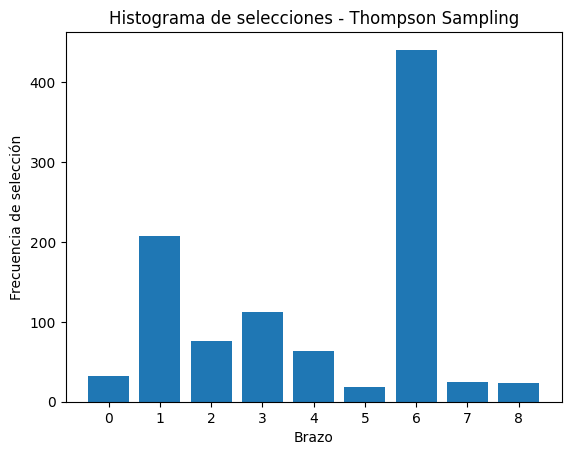

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from core.thompson import ThompsonSampling
# from core.mab import Arm  # Asumiendo que la clase Arm tiene al menos un ID

# Configuración
N = 10000

conversion_rates = [0.05, 0.13, 0.09, 0.16, 0.11, 0.04, 0.2, 0.08, 0.01]
d = len(conversion_rates)

# Simulación de recompensas (matriz binaria como antes)
X = np.zeros((N, d))
for i in range(N):
    for j in range(d):
        X[i, j] = 1 if np.random.rand() <= conversion_rates[j] else 0

# Preparar brazos
# In ipython-input-53-c4581f0fa29e, change line 18 to:
arms = {f"arm_{i}": Arm(arm_id=f"arm_{i}", name=f"arm_{i}") for i in range(d)}
# Added name=f"arm_{i}" to provide the name argument. You can use any suitable name.# Inicializar estrategias
ts = ThompsonSampling()
total_reward_ts = 0
strategy_selected_ts = []

# Simulación
for n in range(N):
    selected_arm_id = ts.select_arm(arms)
    selected_arm_index = int(selected_arm_id.split("_")[1])
    reward = X[n, selected_arm_index]

    ts.update(selected_arm_id, reward, arms)
    total_reward_ts += reward
    strategy_selected_ts.append(selected_arm_index)

# Benchmark aleatorio
total_reward_random = 0
strategy_selected_random = []
for n in range(N):
    arm_index = np.random.randint(d)
    reward = X[n, arm_index]
    total_reward_random += reward
    strategy_selected_random.append(arm_index)

# Resultados
absolute_return = (total_reward_ts - total_reward_random) * 100
relative_return = ((total_reward_ts - total_reward_random) / total_reward_random) * 100

print("Retorno Absoluto: {:.0f} $".format(absolute_return))
print("Retorno Relativo: {:.2f} %".format(relative_return))

# Visualización
plt.hist(strategy_selected_ts, bins=np.arange(d + 1) - 0.5, rwidth=0.8)
plt.xticks(range(d))
plt.title("Histograma de selecciones - Thompson Sampling")
plt.xlabel("Brazo")
plt.ylabel("Frecuencia de selección")
plt.show()


In [ ]:
len(strategy_selected_ts)

1000

Retorno total con Thompson Sampling: 1917.0
Retorno total con selección aleatoria: 974.0
Retorno Absoluto: 943 recompensas
Retorno Relativo: 96.82%


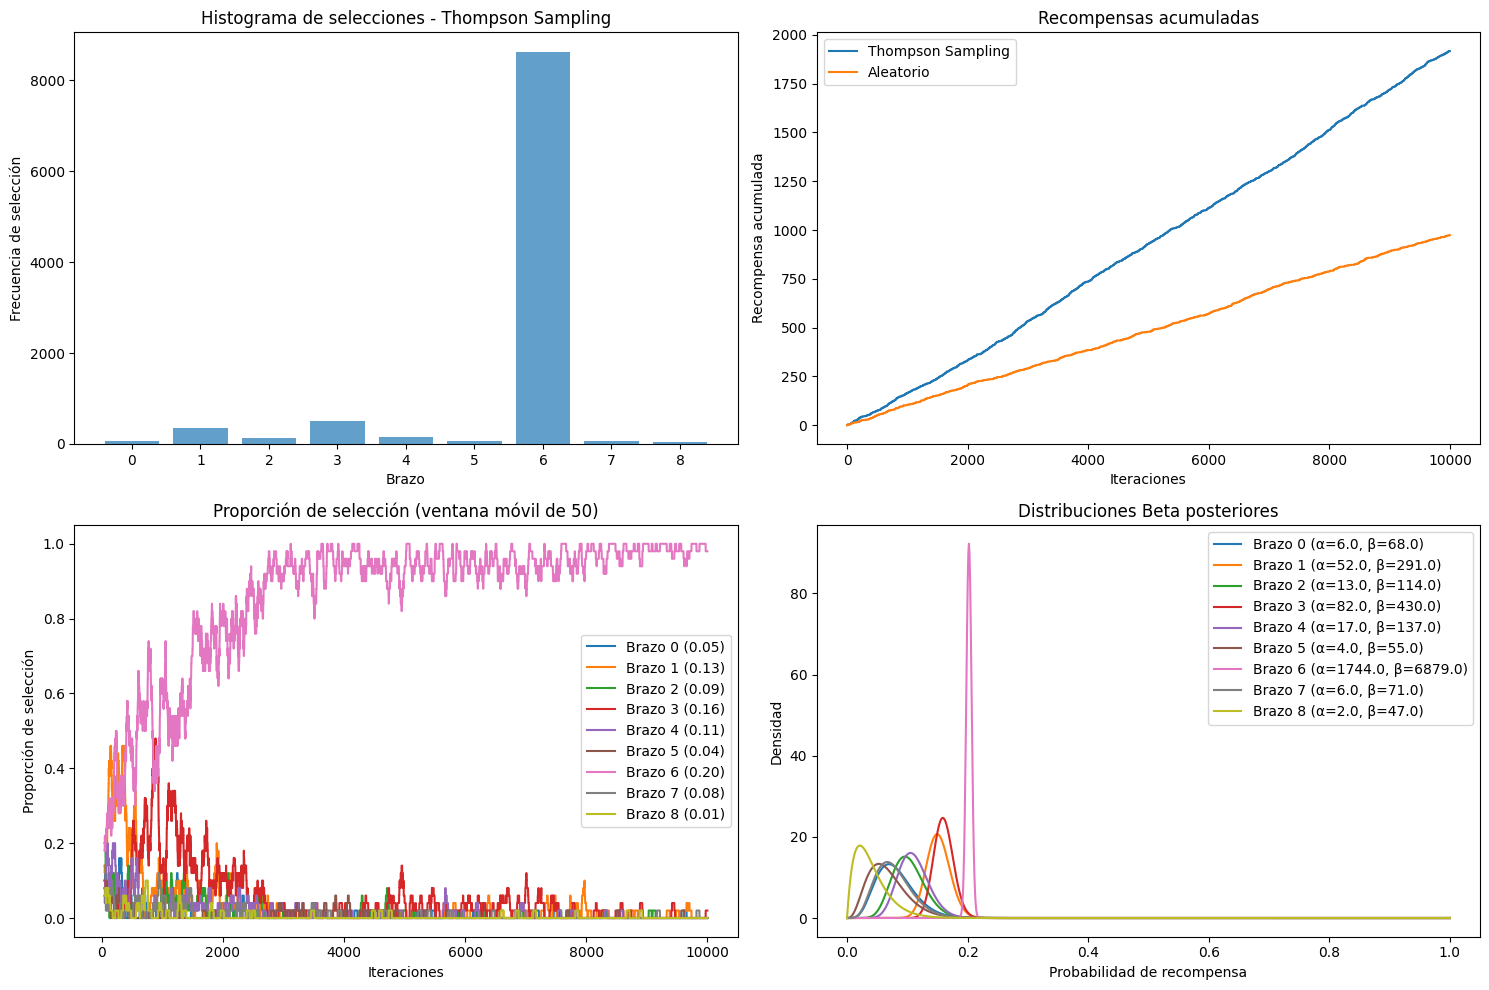


Estadísticas finales por brazo:
-------------------------------
Brazo    Tasa Real  Estimación   Tiradas 
-------------------------------
0        0.050      0.069        72       (0.7%)
1        0.130      0.150        341      (3.4%)
2        0.090      0.096        125      (1.2%)
3        0.160      0.159        510      (5.1%)
4        0.110      0.105        152      (1.5%)
5        0.040      0.053        57       (0.6%)
6        0.200      0.202        8621     (86.2%)
7        0.080      0.067        75       (0.8%)
8        0.010      0.021        47       (0.5%)

Análisis del mejor brazo:
El mejor brazo era el 6 con tasa de conversión 0.200
Fue seleccionado 8621 veces (86.2% del total)

Regret total: 83.00
Regret promedio por iteración: 0.0083


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Any

# Ya que tenemos los archivos directamente, importamos las clases necesarias
#from core.mab import Arm, BanditStrategy, MultiArmedBandit
#from core.thompson import ThompsonSampling

# Configuración
N = 10000  # Número de iteraciones
conversion_rates = [0.05, 0.13, 0.09, 0.16, 0.11, 0.04, 0.2, 0.08, 0.01]
d = len(conversion_rates)  # Número de brazos

# Creamos los brazos
arms = {f"arm_{i}": Arm(arm_id=f"arm_{i}", name=f"Brazo {i}") for i in range(d)}

# Inicializamos la estrategia Thompson Sampling
ts = ThompsonSampling(alpha_prior=1.0, beta_prior=1.0)

# Arrays para almacenar resultados
rewards_ts = np.zeros(N)
selected_arms_ts = np.zeros(N, dtype=int)
cumulative_rewards_ts = np.zeros(N)

# Simulación para Thompson Sampling
for n in range(N):
    # Seleccionar brazo según la estrategia
    selected_arm_id = ts.select_arm(arms)
    selected_arm_index = int(selected_arm_id.split("_")[1])

    # Generar recompensa basada en la tasa de conversión del brazo
    reward = 1 if np.random.rand() <= conversion_rates[selected_arm_index] else 0

    # Actualizar estadísticas del brazo
    arms[selected_arm_id].update(reward)

    # Actualizar la estrategia Thompson Sampling
    ts.update(selected_arm_id, reward, arms)

    # Guardar datos para análisis
    rewards_ts[n] = reward
    selected_arms_ts[n] = selected_arm_index
    cumulative_rewards_ts[n] = rewards_ts[:n+1].sum()

# Simulación para estrategia aleatoria (para comparación)
rewards_random = np.zeros(N)
selected_arms_random = np.zeros(N, dtype=int)
cumulative_rewards_random = np.zeros(N)

for n in range(N):
    # Seleccionar brazo aleatoriamente
    selected_arm_index = np.random.randint(d)
    selected_arm_id = f"arm_{selected_arm_index}"

    # Generar recompensa basada en la tasa de conversión del brazo
    reward = 1 if np.random.rand() <= conversion_rates[selected_arm_index] else 0

    # Guardar datos para análisis
    rewards_random[n] = reward
    selected_arms_random[n] = selected_arm_index
    cumulative_rewards_random[n] = rewards_random[:n+1].sum()

# Análisis de resultados
total_reward_ts = cumulative_rewards_ts[-1]
total_reward_random = cumulative_rewards_random[-1]

absolute_return = total_reward_ts - total_reward_random
relative_return = (absolute_return / total_reward_random) * 100

print(f"Retorno total con Thompson Sampling: {total_reward_ts}")
print(f"Retorno total con selección aleatoria: {total_reward_random}")
print(f"Retorno Absoluto: {absolute_return:.0f} recompensas")
print(f"Retorno Relativo: {relative_return:.2f}%")

# Función para PDF Beta (para visualización)
def beta_pdf(x, a, b):
    from scipy.special import beta as beta_function
    return x**(a-1) * (1-x)**(b-1) / beta_function(a, b)

# Visualizaciones
plt.figure(figsize=(15, 10))

# 1. Histograma de selecciones
plt.subplot(2, 2, 1)
plt.hist(selected_arms_ts, bins=np.arange(d + 1) - 0.5, rwidth=0.8, alpha=0.7)
plt.xticks(range(d))
plt.title("Histograma de selecciones - Thompson Sampling")
plt.xlabel("Brazo")
plt.ylabel("Frecuencia de selección")

# 2. Comparación de recompensas acumuladas
plt.subplot(2, 2, 2)
plt.plot(cumulative_rewards_ts, label='Thompson Sampling')
plt.plot(cumulative_rewards_random, label='Aleatorio')
plt.title("Recompensas acumuladas")
plt.xlabel("Iteraciones")
plt.ylabel("Recompensa acumulada")
plt.legend()

# 3. Proporciones de selección a lo largo del tiempo
plt.subplot(2, 2, 3)
window_size = 50
for i in range(d):
    # Calcular proporción móvil para cada brazo
    counts = np.zeros(N - window_size + 1)
    for j in range(N - window_size + 1):
        counts[j] = np.sum(selected_arms_ts[j:j+window_size] == i) / window_size
    plt.plot(range(window_size-1, N), counts, label=f'Brazo {i} ({conversion_rates[i]:.2f})')

plt.title(f"Proporción de selección (ventana móvil de {window_size})")
plt.xlabel("Iteraciones")
plt.ylabel("Proporción de selección")
plt.legend()

# 4. Distribuciones Beta finales
plt.subplot(2, 2, 4)
x = np.linspace(0, 1, 1000)
try:
    from scipy.stats import beta
    for i in range(d):
        arm_id = f"arm_{i}"
        alpha = ts.alphas[arm_id]
        beta_val = ts.betas[arm_id]
        y = beta.pdf(x, alpha, beta_val)
        plt.plot(x, y, label=f'Brazo {i} (α={alpha:.1f}, β={beta_val:.1f})')
except ImportError:
    # Fallback si scipy no está disponible
    for i in range(d):
        arm_id = f"arm_{i}"
        alpha = ts.alphas[arm_id]
        beta_val = ts.betas[arm_id]
        # Aproximación simplificada
        y = x**(alpha-1) * (1-x)**(beta_val-1)
        plt.plot(x, y/y.max(), label=f'Brazo {i} (α={alpha:.1f}, β={beta_val:.1f})')

plt.title("Distribuciones Beta posteriores")
plt.xlabel("Probabilidad de recompensa")
plt.ylabel("Densidad")
plt.legend()

plt.tight_layout()
plt.show()

# Análisis de los resultados de Thompson Sampling
print("\nEstadísticas finales por brazo:")
print("-------------------------------")
print(f"{'Brazo':<8} {'Tasa Real':<10} {'Estimación':<12} {'Tiradas':<8}")
print("-------------------------------")

# Mostrar estadísticas de cada brazo
for i in range(d):
    arm_id = f"arm_{i}"
    arm = arms[arm_id]
    real_rate = conversion_rates[i]
    estimated_rate = arm.mean_reward
    pulls = arm.total_pulls

    # Calcular proporciones de selección
    selection_percentage = (pulls / N) * 100

    print(f"{i:<8} {real_rate:<10.3f} {estimated_rate:<12.3f} {pulls:<8} ({selection_percentage:.1f}%)")

# Identificar el mejor brazo
best_arm_index = np.argmax(conversion_rates)
best_arm_id = f"arm_{best_arm_index}"
best_arm_pulls = arms[best_arm_id].total_pulls
best_arm_percentage = (best_arm_pulls / N) * 100

print("\nAnálisis del mejor brazo:")
print(f"El mejor brazo era el {best_arm_index} con tasa de conversión {conversion_rates[best_arm_index]:.3f}")
print(f"Fue seleccionado {best_arm_pulls} veces ({best_arm_percentage:.1f}% del total)")

# Calcular regret
optimal_expected_reward = conversion_rates[best_arm_index] * N
actual_reward = cumulative_rewards_ts[-1]
regret = optimal_expected_reward - actual_reward

print(f"\nRegret total: {regret:.2f}")
print(f"Regret promedio por iteración: {regret/N:.4f}")